# Stock Market Prediction-Apple

## Importing libraries

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import pandas_datareader as web
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=web.DataReader('AAPL',data_source='yahoo',start='2000-01-01',end='2022-12-1')

In [9]:
df.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,1.638112e+08,0.782493
2000-01-03,1.004464,0.907924,0.936384,0.999442,5.357968e+08,0.851942
2000-01-04,0.987723,0.903460,0.966518,0.915179,5.123776e+08,0.780115
2000-01-05,0.987165,0.919643,0.926339,0.928571,7.783216e+08,0.791530
2000-01-06,0.955357,0.848214,0.947545,0.848214,7.679728e+08,0.723033
2000-01-07,0.901786,0.852679,0.861607,0.888393,4.607344e+08,0.757282
2000-01-10,0.912946,0.845982,0.910714,0.872768,5.050640e+08,0.743963
2000-01-11,0.887277,0.808036,0.856585,0.828125,4.415488e+08,0.705909
2000-01-12,0.852679,0.772321,0.848214,0.778460,9.760688e+08,0.663573


In [10]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999
2022-12-01,149.130005,146.615005,148.210007,148.309998,71250416.0,148.309998


In [11]:
df.shape

(5768, 6)

## Visualization on closing data of Apple

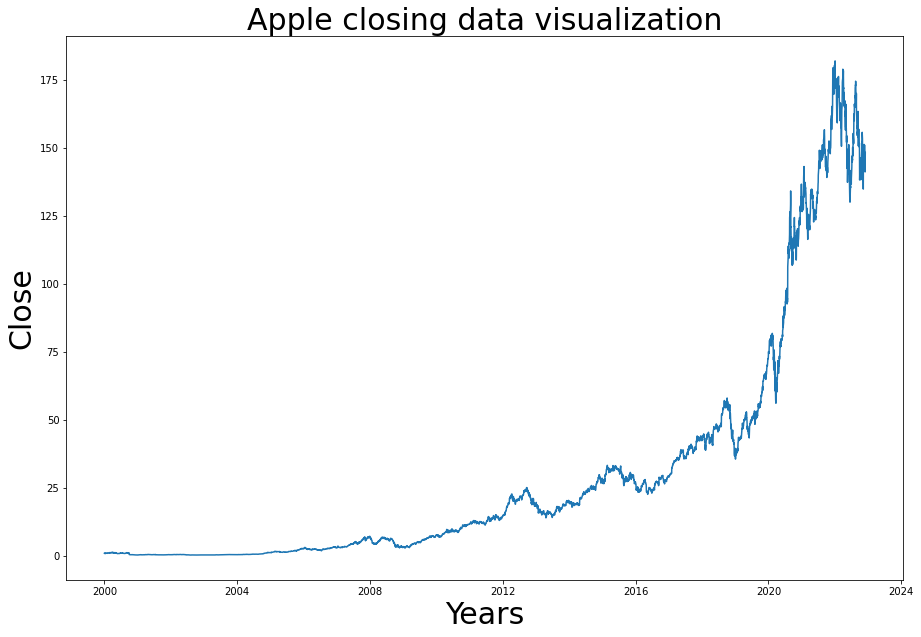

In [12]:
plt.figure(figsize=(15,10))
plt.title('Apple closing data visualization',fontsize=30)
plt.xlabel('Years',fontsize=30)
plt.ylabel("Close",fontsize=30)
plt.plot(df['Close'])
plt.show()

In [13]:
df=df[['Close']]

In [14]:
df.head(10)

,Close
Date,
1999-12-31,0.917969
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
2000-01-07,0.888393
2000-01-10,0.872768
2000-01-11,0.828125
2000-01-12,0.778460


#### Filtering the Close data into data

In [15]:
data=df.filter(['Close'])

#### Converting to numpy array

In [16]:
dataset=data.values

In [17]:
dataset

array([[  0.91796899],
       [  0.99944198],
       [  0.91517901],
       ...,
       [141.16999817],
       [148.02999878],
       [148.30999756]])

#### Fixing training rows 

In [18]:
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

4615

## Scaling

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [20]:
pd.DataFrame(scaled_data)

,0
0,0.003761
1,0.004209
2,0.003746
3,0.003819
4,0.003377
...,...
5763,0.813506
5764,0.792106
5765,0.775328
5766,0.813066


In [21]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    if i<=61:
        print(x_train)
        print(y_train)
    

[array([0.00376114, 0.00420934, 0.00374579, 0.00381946, 0.00337739,
       0.00359843, 0.00351247, 0.00326688, 0.00299366, 0.00346335,
       0.00364448, 0.00381639, 0.00394533, 0.00428609, 0.00417864,
       0.00392998, 0.00422469, 0.00412338, 0.00411417, 0.0037028 ,
       0.00380718, 0.00363527, 0.00356466, 0.00378569, 0.00401594,
       0.00431372, 0.00435363, 0.00424311, 0.00428609, 0.00405277,
       0.00439967, 0.00455624, 0.00431679, 0.00435363, 0.00417557,
       0.00430144, 0.00442116, 0.00436974, 0.00413259, 0.00427381,
       0.00434135, 0.00511189, 0.0047036 , 0.00499831, 0.00488472,
       0.00474657, 0.0047036 , 0.00471588, 0.00488779, 0.00466983,
       0.00432293, 0.00442116, 0.00468211, 0.00485095, 0.00475271,
       0.00533907, 0.00579341, 0.0056522 , 0.00552326, 0.00556624])]
[0.005544756170813445]
[array([0.00376114, 0.00420934, 0.00374579, 0.00381946, 0.00337739,
       0.00359843, 0.00351247, 0.00326688, 0.00299366, 0.00346335,
       0.00364448, 0.00381639, 0.00

In [22]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [23]:
x_train.shape

(4555, 60)

In [24]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4555, 60, 1)

In [25]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4555, 60, 1)
(4555,)
(1153, 60, 1)
(1153, 1)


### Adding Layers

In [27]:
model=Sequential() 
model.add(LSTM(80,return_sequences=True,input_shape=(x_train.shape[1],1)))     
model.add(Dropout(0.15))
model.add(LSTM(80,return_sequences=True))     
model.add(Dropout(0.15))
model.add(LSTM(80,return_sequences=False)) 
model.add(Dropout(0.15))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
model.compile(optimizer='adam',loss='MSE',metrics=['accuracy'])

In [29]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=5,epochs=20)

Epoch 1/20
911/911 [==============================] - 82s 79ms/step - loss: 1.4610e-04 - accuracy: 2.1954e-04 - val_loss: 12259.8604 - val_accuracy: 0.0000e+00
Epoch 2/20
911/911 [==============================] - 69s 76ms/step - loss: 7.7205e-05 - accuracy: 2.1954e-04 - val_loss: 12250.9395 - val_accuracy: 0.0000e+00
Epoch 3/20
911/911 [==============================] - 71s 78ms/step - loss: 6.8461e-05 - accuracy: 2.1954e-04 - val_loss: 12244.1816 - val_accuracy: 0.0000e+00
Epoch 4/20
911/911 [==============================] - 73s 80ms/step - loss: 7.2533e-05 - accuracy: 2.1954e-04 - val_loss: 12256.4961 - val_accuracy: 0.0000e+00
Epoch 5/20
911/911 [==============================] - 69s 76ms/step - loss: 5.9998e-05 - accuracy: 2.1954e-04 - val_loss: 12263.8018 - val_accuracy: 0.0000e+00
Epoch 6/20
911/911 [==============================] - 72s 79ms/step - loss: 6.0146e-05 - accuracy: 2.1954e-04 - val_loss: 12254.1348 - val_accuracy: 0.0000e+00
Epoch 7/20
911/911 [====================

In [158]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 60, 80)            26240     
                                                                 
 dropout_12 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_14 (LSTM)              (None, 60, 80)            51520     
                                                                 
 dropout_13 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_15 (LSTM)              (None, 80)                51520     
                                                                 
 dropout_14 (Dropout)        (None, 80)                0         
                                                                 
 dense_8 (Dense)             (None, 25)               

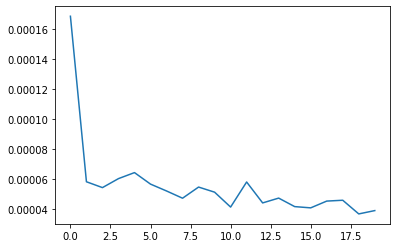

In [159]:
plt.plot(r.history['loss'],label='loss')

In [166]:
y_pred=model.predict(x_test)

36/36 [==============================] - 4s 94ms/step


In [167]:
y_pred

array([[0.23818886],
       [0.24208409],
       [0.24680296],
       ...,
       [0.7738041 ],
       [0.7737468 ],
       [0.77442807]], dtype=float32)

In [170]:
y_pred_unscaled=scaler.inverse_transform(y_pred)

In [173]:
pd.DataFrame(y_pred_unscaled)

,0
0,43.531235
1,44.239292
2,45.097069
3,46.148296
4,47.184486
...,...
1147,140.298660
1148,140.834229
1149,140.893082
1150,140.882660


### RMSE

In [175]:
rmse=np.sqrt(np.mean(y_pred_scaled-y_test)**2)
rmse

2.8341415756278567

In [176]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['y_pred_scaled']=y_pred_scaled

C:\Users\user\AppData\Local\Temp\ipykernel_19532\2470061396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['y_pred_scaled']=y_pred_scaled


In [178]:
valid['y_pred_scaled']

Date
2018-05-02     43.531235
2018-05-03     44.239292
2018-05-04     45.097069
2018-05-07     46.148296
2018-05-08     47.184486
                 ...    
2022-11-18    140.298660
2022-11-21    140.834229
2022-11-22    140.893082
2022-11-23    140.882660
2022-11-25    141.006500
Name: y_pred_scaled, Length: 1152, dtype: float32

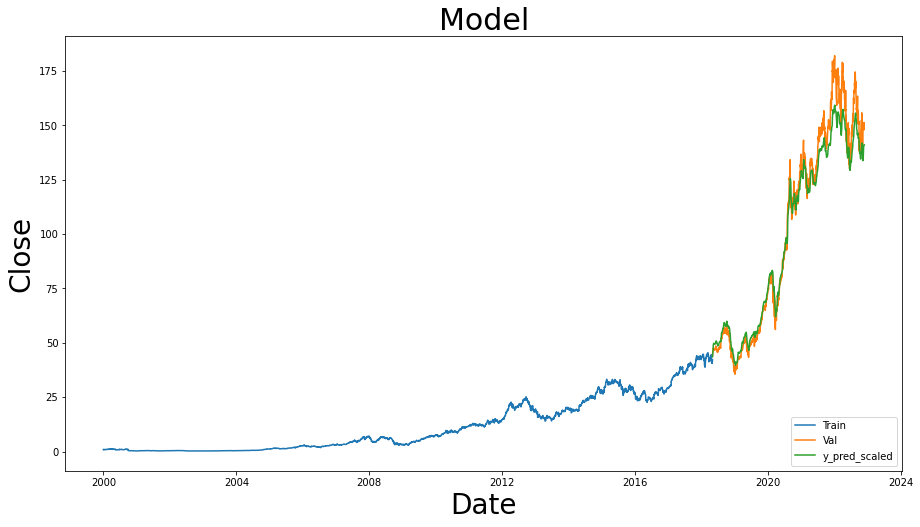

In [179]:
plt.figure(figsize=(15,8))
plt.title('Model',fontsize=30)
plt.xlabel('Date',fontsize=28)
plt.ylabel('Close',fontsize=28)
plt.plot(train['Close'])
plt.plot(valid[['Close','y_pred_scaled']])
plt.legend(['Train','Val','y_pred_scaled'],loc='lower right')
plt.show()

In [180]:
valid.tail(20)

,Close,y_pred_scaled
Date,,
2022-10-28,155.740005,139.998978
2022-10-31,153.339996,140.608597
2022-11-01,150.649994,141.421799
2022-11-02,145.029999,141.859070
2022-11-03,138.880005,141.369614
2022-11-04,138.380005,139.746643
2022-11-07,138.919998,137.710007
2022-11-08,139.500000,135.971588
2022-11-09,134.869995,134.847305


In [181]:
apple=web.DataReader('AAPL',data_source='yahoo',start='2000-01-01',end='2022-11-25')
new_df=apple.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 4s 4s/step
[[140.90329]]


In [182]:
apple2=web.DataReader('AAPL',data_source='yahoo',start='2022-11-26',end='2022-11-26')

In [183]:
print(apple2['Close'])

Date
2022-11-25    148.110001
Name: Close, dtype: float64
